In [1]:
# The following file is being used to test the Pipeline
import matplotlib.pyplot as plt
''' Import statements for all the files involved'''
from main import *
from utils import *
from wfield_utils import *
from registration import *
from hemocorrection import *
from denoising import *
from debug_visualize import *
from data_loading_functions import *
from data_preprocessor import *
from tqdm import tqdm

In [2]:
# The folllowing code is from main(). 
# params are global variables used to modify the code
params = {
    'path_to_session_data':       r"C:\Users\evilm\Downloads\07-18-2024",
    'pipe_num':           0,              # select desired pipeline number
    'get_raw_brightness': False,
    'get_DeltaF':         False,
    'get_zScore':         False
          }
# This is inside def main()
# For purposes of testing to visualise the data we will do analysis here.
session_file_paths = get_file_paths(params['path_to_session_data'])
# create an obj for each recording within the session
recordings = {}
if session_file_paths != 0:
    n = 1
    recordings[f'recording_{n}'] = rawDataPreprocessor(params['path_to_session_data'])

print(f'{datetime.datetime.now().time()}: Done loading session data into object')


14:36:34.965364: Done loading session data into object


In [ ]:
# Testing motion correction
#print(f'{datetime.datetime.now().time()}: Starting Motion Correction')
#_, _, motion_corrected_frames_all = motion_correct(dat=recordings['recording_1'].all_frames, out=None, mode='ecc', apply_shifts=True)
#print(f'{datetime.datetime.now().time()}: Done Motion Correction')
#np.save(params['path_to_session_data']+"\motion_corrected_data",motion_corrected_frames_all)

In [3]:
#motion_corrected_frames_all = np.load(r"C:\Users\evilm\Downloads\07-18-2024\motion_corrected_data.npy")

In [5]:
#im_array,SVD_stack = denoise_svd(motion_corrected_frames_all[:,0,...],rank=200)

Denoising: 10064it [29:57,  5.40it/s]

(16033, 640, 540)


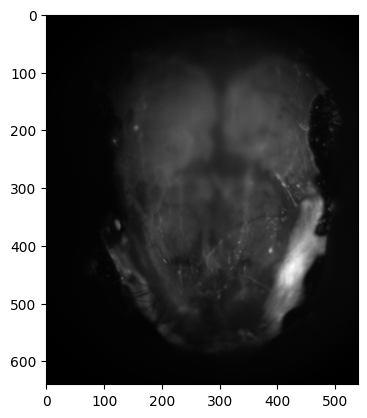

In [25]:
%matplotlib inline
print(recordings[f'recording_{1}'].blue_frames.shape)
plt.imshow(recordings[f'recording_{1}'].blue_frames[-1],cmap="gray")
#plt.imshow(recordings[f'recording_{1}'].violet_frames[-1])
plt.show()

In [ ]:
# Testing Denoising and Compression
motion_corrected_frames_all = np.load(r"C:\Users\evilm\Downloads\07-18-2024\motion_corrected_data.npy")
# 2. Denoising and Compression
print(f'{datetime.datetime.now().time()}: Starting  Blue Frames')
denoised_blue_frames, blueU, blueS, blueVT = denoise_svd(motion_corrected_frames_all[:,0,...],rank=200) # only denoise blue channel for now
print(f'{datetime.datetime.now().time()}: Done Denoising Blue Frames')

print(f'{datetime.datetime.now().time()}: Starting  Violet Frames')
denoised_violet_frames, violetU, violetS, violetVT = denoise_svd(motion_corrected_frames_all[:,1,...],rank=200) # only denoise blue channel for now
print(f'{datetime.datetime.now().time()}: Done Denoising Violet Frames')

np.save(params['path_to_session_data']+"\denoised_blue_frames",denoised_blue_frames)
np.save(params['path_to_session_data']+"\denoised_violet_frames",denoised_violet_frames)
np.save(params['path_to_session_data']+"\blueU",blueU)
np.save(params['path_to_session_data']+"\blueS",blueS)
np.save(params['path_to_session_data']+"\blueVT",blueVT)
np.save(params['path_to_session_data']+"\violetU",violetU)
np.save(params['path_to_session_data']+"\violetS",violetS)
np.save(params['path_to_session_data']+"\violetVT",violetVT)

In [ ]:
#get_recording_paths(params['path_to_session_data'])
'''
data = recordings['recording_1'].demo_pipeline()
data = np.array(data)
np.save(params['path_to_session_data']+"\blue_frame_data",data)
'''

In [ ]:
#data = np.load(r"C:\Users\evilm\Downloads\07-18-2024\blue_frame_data.npy")

In [ ]:
#%matplotlib inline
#plt.imshow(np.mean(data,axis=0),cmap="gray")
#plt.show()